# exp learning+ research on house price prediction 2


# importing dataset of model 

In [58]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [59]:
path = "C:\\Users\\ASUS\\Desktop\\ml full\\ML\\housing data\\preprocessed_house_price_india.csv"
df = pd.read_csv(path)
df.head()


,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,2016-05-01,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,2016-05-01,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,2016-05-01,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,2016-05-01,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,2016-05-01,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


# info on dataset

In [60]:
df.shape

(14620, 22)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   14620 non-null  object 
 1   number of bedrooms                     14620 non-null  int64  
 2   number of bathrooms                    14620 non-null  float64
 3   living area                            14620 non-null  int64  
 4   lot area                               14620 non-null  int64  
 5   number of floors                       14620 non-null  float64
 6   waterfront present                     14620 non-null  int64  
 7   number of views                        14620 non-null  int64  
 8   condition of the house                 14620 non-null  int64  
 9   grade of the house                     14620 non-null  int64  
 10  Area of the house(excluding basement)  14620 non-null  int64  
 11  Ar

In [62]:
 df.isna().sum()

Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

division of training data

# Data Exploration and Cleaning

In [63]:
df, test_df = train_test_split(df, test_size=0.2 , random_state=42)
display(df.shape)

(11696, 22)

# Checking for duplicates and droping them


In [64]:
print("Number of duplicate rows:", df.duplicated(subset=None, keep='first').sum())


Number of duplicate rows: 0


In [65]:
df.drop_duplicates(subset=None, keep='first',inplace=True)


# Count plot of all amenities features

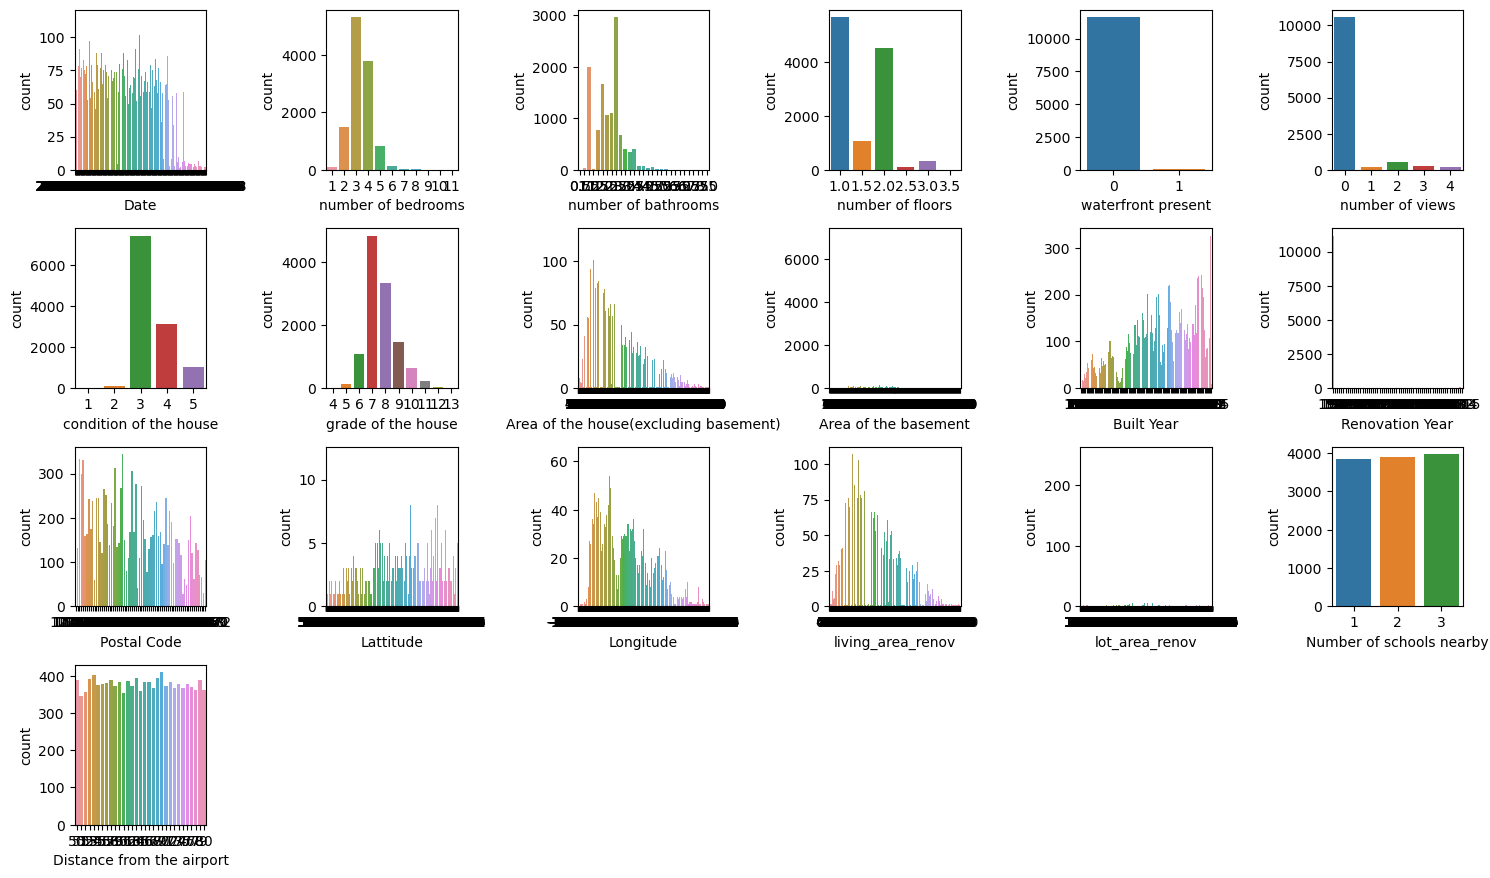

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt
amenities_cols = df.drop(columns=['Price', 'living area', 'lot area']).columns
plt.figure(figsize=(15, 15))
for n, variable in enumerate(amenities_cols):
    ax = plt.subplot(7, 6, n + 1)
    g = sns.countplot(data=df, x=df[variable], ax=ax)
plt.tight_layout()
plt.show()



In [309]:
df.loc[df['Lattitude'] == 9]

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price


In [310]:
df.loc[df['condition of the house'] == 9]


,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price


In [311]:
df.drop(df[(df['condition of the house'] == 9) & 
           (df['number of floors'] == 9) & 
           (df['waterfront present'] == 9)].index, inplace=True)


# Box plot of all amenities features


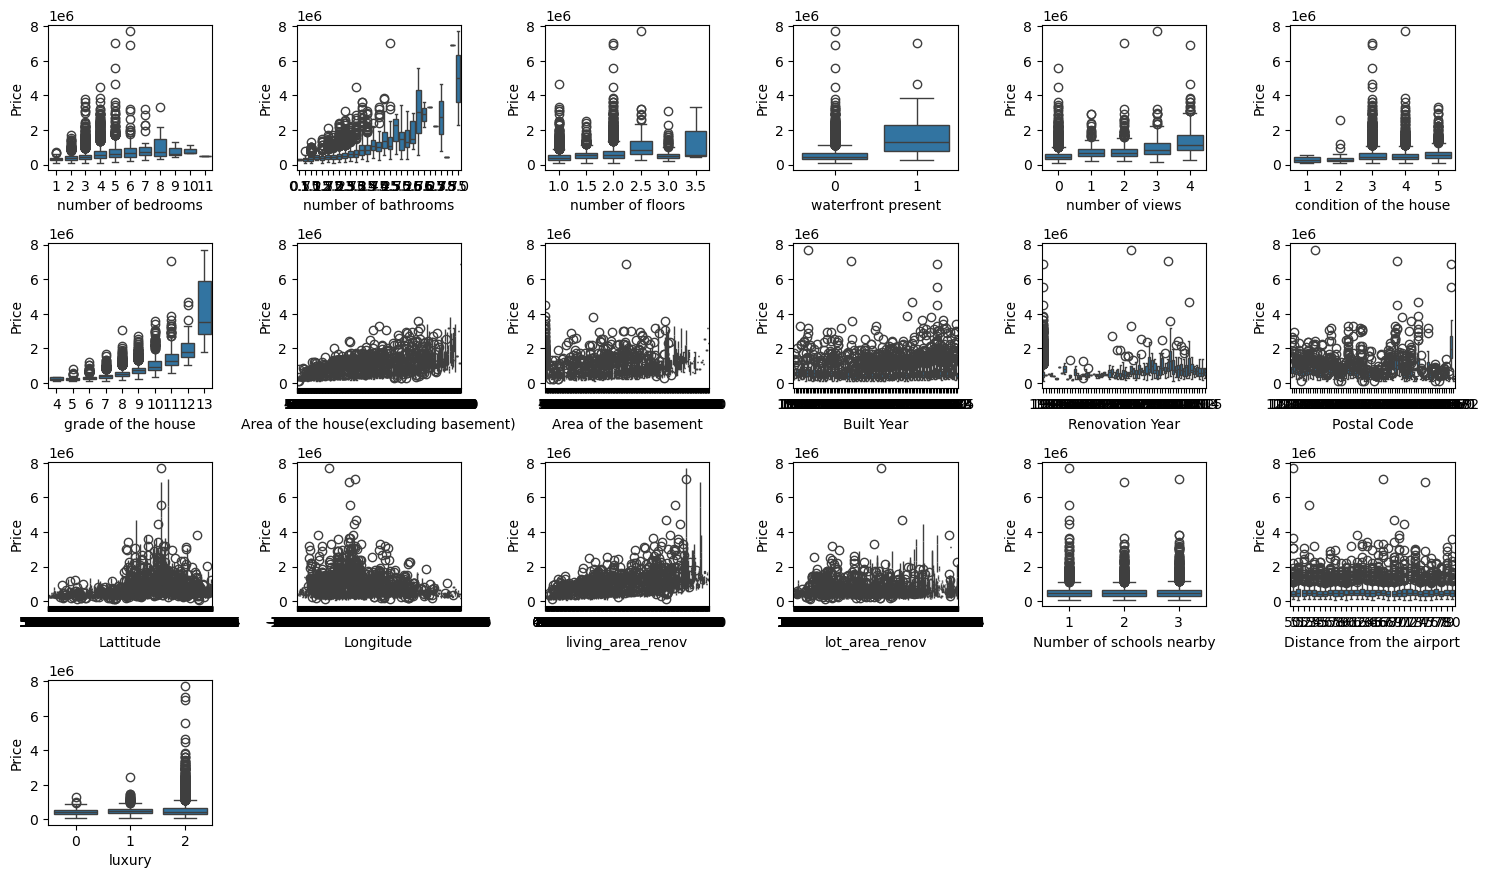

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_amenities_cols = df.drop(columns=['Price', 'living area', 'lot area']).select_dtypes(include='number').columns
plt.figure(figsize=(15, 15))
for n, variable in enumerate(numeric_amenities_cols):
    ax = plt.subplot(7, 6, n + 1)
    sns.boxplot(data=df, x=df[variable], y=df['Price'], ax=ax)
plt.tight_layout()
plt.show()


# Histogram and Boxplot of continous features


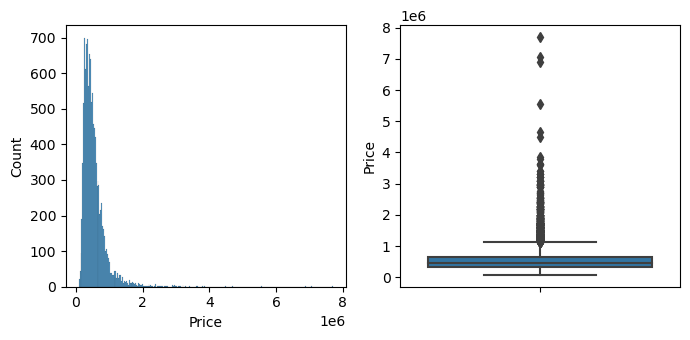

In [313]:
plt.subplot(1, 2, 1)
_ = sns.histplot(x='Price', data=df)

plt.subplot(1, 2, 2)
_ = sns.boxplot(y='Price', data=df)
plt.tight_layout()  

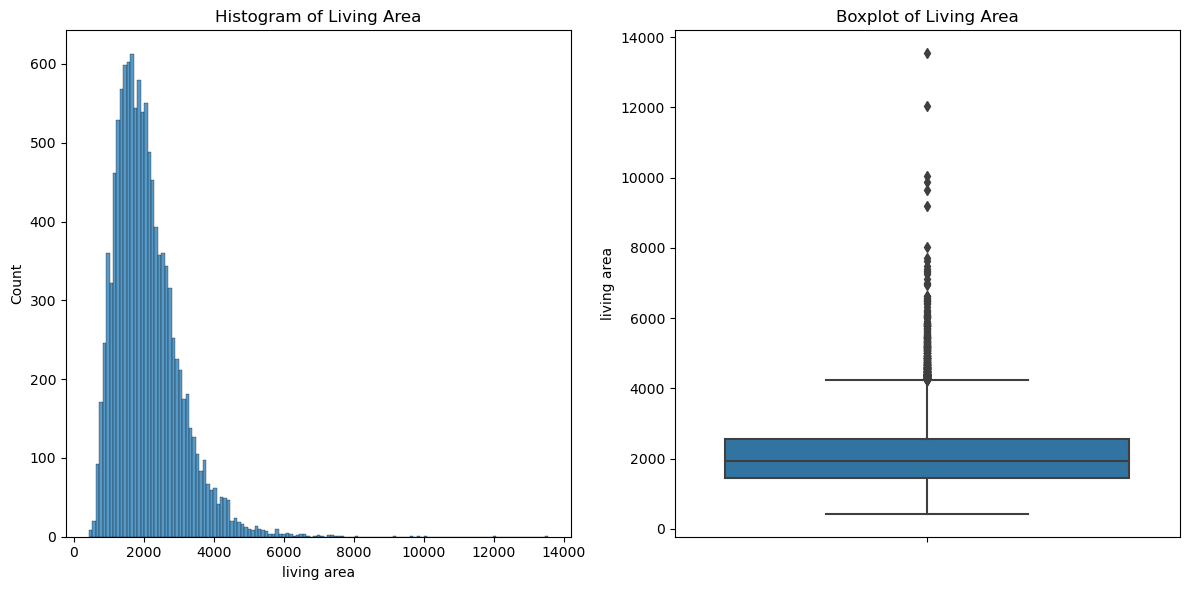

In [314]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
_ = sns.histplot(x='living area', data=df)
plt.title('Histogram of Living Area')
plt.subplot(1, 2, 2)
_ = sns.boxplot(y='living area', data=df)
plt.title('Boxplot of Living Area')

plt.tight_layout()
plt.show()


# Feature engineering


In [315]:
def feature_eng(df):
  
    df['Longitude'] = df['Longitude']
    df['Lattitude'] = df['Lattitude']
    
   
    
    df['Luxury'] = 0
    indoor_luxury = (df['number of bedrooms'] > 3) | (df['number of bathrooms'] > 2)
    outdoor_luxury = (df['waterfront present'] == 1) | (df['number of views'] > 1)
    
    df.loc[indoor_luxury, 'Luxury'] = 1
    df.loc[outdoor_luxury, 'Luxury'] = 2
    df.loc[indoor_luxury & outdoor_luxury, 'Luxury'] = 3
    df.drop(columns=['number of bedrooms', 'number of bathrooms', 'waterfront present', 'number of views'], inplace=True)
    
    return df

df = feature_eng(df)

df.head()


,Date,living area,lot area,number of floors,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Luxury
6459,2016-08-05,2500,51836,1.0,3,9,1510,990,2013,0,122012,52.6994,-114.179,2270,54450,3,51,650000,1
10885,2016-10-16,1275,20000,1.0,4,6,1275,0,1991,0,122069,52.6096,-114.680,1660,20000,2,76,309600,1
1369,2016-05-22,1930,15531,2.0,3,7,1930,0,1979,0,122040,52.5750,-114.486,1580,7800,1,80,275000,1
740,2016-05-13,700,6000,1.0,4,6,700,0,1949,0,122014,52.9815,-114.506,920,6000,1,62,267800,0
3474,2016-06-23,2210,9371,2.0,4,8,2210,0,1968,0,122066,52.5934,-114.469,2300,11584,3,69,305000,1


 # Data Preprocessing 
 # 1. removing outliers



In [66]:
def feature_eng_updated(df):
    df["luxury"] = 0
    if "living area" in df.columns and "number of floors" in df.columns and "condition of the house" in df.columns:
        df.loc[
            (df["living area"] > 3000) | 
            (df["number of floors"] > 1.5) | 
            (df["condition of the house"] >= 4), 
            "luxury"
        ] = 1

    if "lot area" in df.columns and "waterfront present" in df.columns and "Number of schools nearby" in df.columns and "Distance from the airport" in df.columns:
        df.loc[
            (df["lot area"] > 5000) | 
            (df["waterfront present"] == 1) | 
            (df["Number of schools nearby"] >= 2) | 
            (df["Distance from the airport"] < 50), 
            "luxury"
        ] = 2
    if "living area" in df.columns and "number of floors" in df.columns and "condition of the house" in df.columns and "lot area" in df.columns and "waterfront present" in df.columns:
        df.loc[
            ((df["living area"] > 3000) & 
             (df["number of floors"] > 1.5) & 
             (df["condition of the house"] >= 4)) &
            ((df["lot area"] > 5000) & 
             (df["waterfront present"] == 1) & 
             (df["Number of schools nearby"] >= 2) & 
             (df["Distance from the airport"] < 50)), 
            "luxury"
        ] = 3
    return df
df_modified = feature_eng_updated(df)
print(df_modified.head())


             Date  number of bedrooms  number of bathrooms  living area  \
6459   2016-08-05                   3                 2.50         2500   
10885  2016-10-16                   4                 1.75         1275   
1369   2016-05-22                   4                 1.50         1930   
740    2016-05-13                   2                 1.00          700   
3474   2016-06-23                   4                 2.25         2210   

       lot area  number of floors  waterfront present  number of views  \
6459      51836               1.0                   0                0   
10885     20000               1.0                   0                0   
1369      15531               2.0                   0                0   
740        6000               1.0                   0                0   
3474       9371               2.0                   0                0   

       condition of the house  grade of the house  ...  Renovation Year  \
6459                        3

In [317]:
print(df.columns.tolist())


['Date', 'living area', 'lot area', 'number of floors', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price', 'Luxury', 'luxury']


In [318]:
df

,Date,living area,lot area,number of floors,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Luxury,luxury
6459,2016-08-05,2500,51836,1.0,3,9,1510,990,2013,0,122012,52.6994,-114.179,2270,54450,3,51,650000,1,0
10885,2016-10-16,1275,20000,1.0,4,6,1275,0,1991,0,122069,52.6096,-114.680,1660,20000,2,76,309600,1,1
1369,2016-05-22,1930,15531,2.0,3,7,1930,0,1979,0,122040,52.5750,-114.486,1580,7800,1,80,275000,1,1
740,2016-05-13,700,6000,1.0,4,6,700,0,1949,0,122014,52.9815,-114.506,920,6000,1,62,267800,0,1
3474,2016-06-23,2210,9371,2.0,4,8,2210,0,1968,0,122066,52.5934,-114.469,2300,11584,3,69,305000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,2016-07-17,2500,8540,2.0,3,9,2500,0,1990,0,122011,52.8059,-114.184,2560,8475,1,61,639000,1,1
13418,2016-12-02,1340,10035,1.0,3,7,1340,0,1959,0,122063,52.7216,-114.444,2090,10035,1,50,227000,0,0
5390,2016-07-21,3270,168000,2.0,4,10,3270,0,1982,0,122053,52.7497,-114.381,3220,7963,2,52,750000,1,1
860,2016-05-15,1310,1500,2.0,3,8,1160,150,2006,0,122044,52.8412,-114.499,1320,1581,1,61,500000,1,1


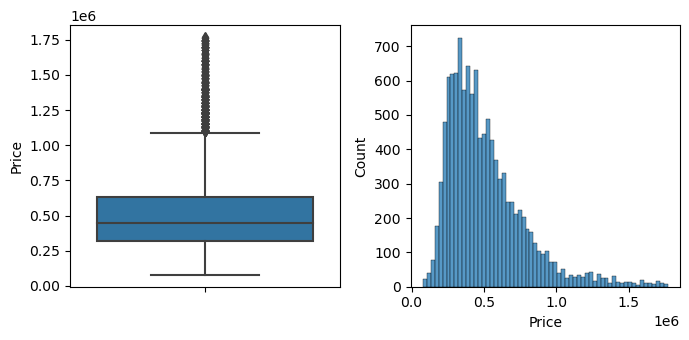

In [319]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1    
filter_price = (df['Price'] >= Q1 - 3.5*IQR) & (df['Price'] <= Q3 + 3.5*IQR)
df = df.loc[filter_price] 
plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Price', data= df)
plt.subplot(1, 2, 2)
_ = sns.histplot(x='Price', data= df)
plt.tight_layout()

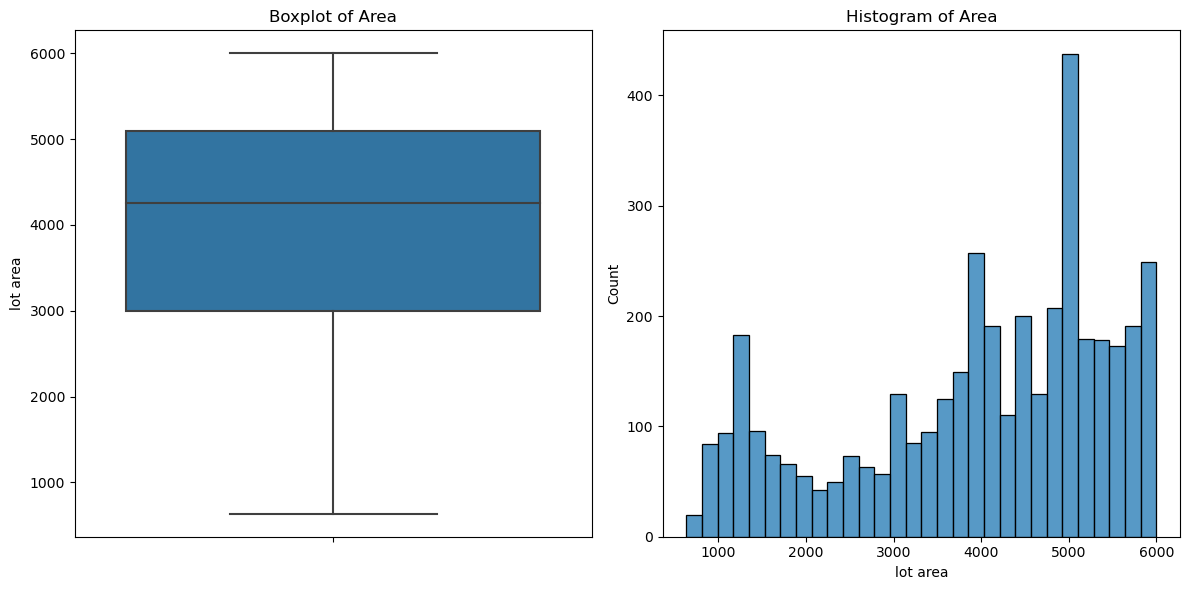

In [320]:
df_modified = df_modified[df_modified['lot area'] <= 6000]
plt.figure(figsize=(12, 6))  
plt.subplot(1, 2, 1)
sns.boxplot(y='lot area', data=df_modified)
plt.title('Boxplot of Area')
plt.subplot(1, 2, 2)
sns.histplot(x='lot area', data=df_modified, bins=30)
plt.title('Histogram of Area')
plt.tight_layout()
plt.show()


# Training data and enabling catbooster

In [321]:
!pip install category_encoders



In [322]:
df['lot area'] = np.log1p(df['lot area'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15020\1496632884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lot area'] = np.log1p(df['lot area'])


In [323]:
df['Price'] = np.log1p(df['Price'])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15020\481605779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = np.log1p(df['Price'])


In [324]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = {
    'Date': ['2023-01-01', '2023-01-02'],
    'number of bedrooms': [3, 4],
    'number of bathrooms': [2, 3],
    'living area': [1500, 2000],
    'lot area': [5000, 6000],
    'number of floors': [1, 2],
    'waterfront present': [0, 1],
    'number of views': [0, 2],
    'condition of the house': [3, 4],
    'grade of the house': [7, 8],
    'Area of the house(excluding basement)': [1400, 1900],
    'Area of the basement': [100, 100],
    'Built Year': [2000, 2005],
    'Renovation Year': [2015, 2020],
    'Postal Code': [98001, 98002],
    'Latitude': [47.123, 47.456],  # Corrected spelling
    'Longitude': [-122.123, -122.456],  # Corrected spelling
    'living_area_renov': [1600, 2100],
    'lot_area_renov': [5200, 6200],
    'Number of schools nearby': [3, 4],
    'Distance from the airport': [10, 15],
    'Price': [500000, 600000]
}
df = pd.DataFrame(data)
print("Columns in the DataFrame:")
print(df.columns)
numerical_cols = ["Latitude", "Longitude","number of floors"]  # Corrected spelling
if all(col in df.columns for col in numerical_cols):
    sc = StandardScaler()
    df[numerical_cols] = sc.fit_transform(df[numerical_cols])
    print("Scaled DataFrame:")
    print(df[numerical_cols])
else:
    print("One or more numerical columns are missing.")

Columns in the DataFrame:
Index(['Date', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Latitude', 'Longitude',
       'living_area_renov', 'lot_area_renov', 'Number of schools nearby',
       'Distance from the airport', 'Price'],
      dtype='object')
Scaled DataFrame:
   Latitude  Longitude  number of floors
0      -1.0        1.0              -1.0
1       1.0       -1.0               1.0


In [325]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical_cols = ["Latitude", "Longitude"]
df[numerical_cols] = sc.fit_transform(df[numerical_cols])
if 'Location' in df.columns:
    df['Location'] = df['Location'].astype('category')
    CBE_encoder = CatBoostEncoder()
    df['Location_encoded'] = CBE_encoder.fit_transform(df['Location'], df['Price'])
print(df.head())

         Date  number of bedrooms  number of bathrooms  living area  lot area  \
0  2023-01-01                   3                    2         1500      5000   
1  2023-01-02                   4                    3         2000      6000   

   number of floors  waterfront present  number of views  \
0              -1.0                   0                0   
1               1.0                   1                2   

   condition of the house  grade of the house  ...  Built Year  \
0                       3                   7  ...        2000   
1                       4                   8  ...        2005   

   Renovation Year  Postal Code  Latitude  Longitude  living_area_renov  \
0             2015        98001      -1.0        1.0               1600   
1             2020        98002       1.0       -1.0               2100   

   lot_area_renov  Number of schools nearby  Distance from the airport   Price  
0            5200                         3                         1

In [326]:
df

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Latitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,2023-01-01,3,2,1500,5000,-1.0,0,0,3,7,...,2000,2015,98001,-1.0,1.0,1600,5200,3,10,500000
1,2023-01-02,4,3,2000,6000,1.0,1,2,4,8,...,2005,2020,98002,1.0,-1.0,2100,6200,4,15,600000


# using linear with optimization


In [327]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
param_grid = {'fit_intercept': [False]}
scores = cross_val_score(model, X_train, y_train, cv=2, scoring='neg_mean_squared_error')
print(scores)

[-0.9769087  -1.03406669]


In [328]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [356]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from category_encoders import CatBoostEncoder
print("Columns in the DataFrame:")
print(df.columns)
scaler = StandardScaler()
numerical_cols = ['Lattitude', 'Longitude']  # Ensure correct spelling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
if 'Postal Code' in df.columns:  # Adjust based on available columns
    df['Postal Code'] = df['Postal Code'].astype('category')
    encoder = CatBoostEncoder()
    df['Postal_Code_encoded'] = encoder.fit_transform(df['Postal Code'], df['Price'])
X = df.drop(columns=['Price', 'Date'])  # Adjust based on actual columns
y = df['Price']  # Target variable
linear_model = LinearRegression()
errors = cross_val_score(linear_model, X, y, cv=10)
print("Cross-validation errors:", errors)
print("Mean error:", errors.mean())

Columns in the DataFrame:
Index(['Date', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')
Cross-validation errors: [0.75438306 0.77863407 0.80291285 0.8004765  0.79736539 0.79769934
 0.7761884  0.75358936 0.80616424 0.80120713]
Mean error: 0.7868620345764076


In [360]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from category_encoders import CatBoostEncoder
import numpy as np

scaler = StandardScaler()
numerical_cols = ['Lattitude', 'Longitude']  # Ensure correct spelling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
if 'Postal Code' in df.columns:  # Adjust based on available columns
    df['Postal Code'] = df['Postal Code'].astype('category')
    encoder = CatBoostEncoder()
    df['Postal_Code_encoded'] = encoder.fit_transform(df['Postal Code'], df['Price'])
price_bins = [0, 500000, 1000000, 1500000, 2000000, np.inf]
price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Price_Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

X = df.drop(columns=['Price', 'Date', 'Price_Category'])  # Drop non-numeric and target columns
y = df['Price_Category']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')  # Calculate F2 score
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)
print('F2 Score: ', f2)

Precision:  0.795689664815233
Recall:  0.8036935704514364
F1 Score:  0.7958911277056933
F2 Score:  0.8002246602877159


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


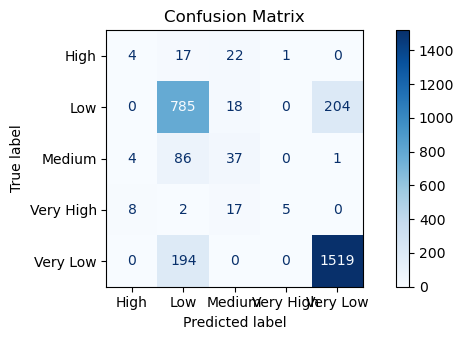

In [361]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=logistic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# poly regression

In [364]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from category_encoders import CatBoostEncoder
import numpy as np


scaler = StandardScaler()
numerical_cols = ['Lattitude', 'Longitude']  # Ensure correct spelling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
if 'Postal Code' in df.columns:
    df['Postal Code'] = df['Postal Code'].astype('category')
    encoder = CatBoostEncoder()
    df['Postal_Code_encoded'] = encoder.fit_transform(df['Postal Code'], df['Price'])

X = df.drop(columns=['Price', 'Date', 'Price_Category'])  # Drop non-numeric and target columns
y = df['Price']  # Target variable

# Create polynomial features
poly_feat = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_poly = poly_feat.fit_transform(X)

# Initialize the linear regression model
poly_model = LinearRegression()
errors_poly = cross_val_score(poly_model, X_poly, y, cv=10)
print("Cross-validation errors (Polynomial Features):", errors_poly)
print("Mean error (Polynomial Features):", errors_poly.mean())

Cross-validation errors (Polynomial Features): [0.81401511 0.89068258 0.83242533 0.87089155 0.89047536 0.36524401
 0.89286989 0.87919619 0.85414452 0.89234959]
Mean error (Polynomial Features): 0.8182294143689353


In [366]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, fbeta_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from category_encoders import CatBoostEncoder
import numpy as np


scaler = StandardScaler()
numerical_cols = ['Lattitude', 'Longitude']  # Ensure correct spelling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
if 'Postal Code' in df.columns:
    df['Postal Code'] = df['Postal Code'].astype('category')
    encoder = CatBoostEncoder()
    df['Postal_Code_encoded'] = encoder.fit_transform(df['Postal Code'], df['Price'])
price_bins = [0, 500000, 1000000, 1500000, 2000000, np.inf]
price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Price_Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)
X = df.drop(columns=['Price', 'Date', 'Price_Category'])  # Drop non-numeric and target columns
y = df['Price_Category']  # Target variable
poly_feat = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_poly = poly_feat.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')  # Calculate F2 score

# Print evaluation metrics
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)
print('F2 Score: ', f2)

Precision:  0.7698621987115926
Recall:  0.7958276333789329
F1 Score:  0.7778088735227766
F2 Score:  0.788206496380054


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RIDGE REGULARIZAION ON LINEAR 


In [367]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, fbeta_score
from category_encoders import CatBoostEncoder
import numpy as np



# Preprocessing: Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Lattitude', 'Longitude']  # Ensure correct spelling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check if 'Postal Code' or any other categorical column exists and encode it
if 'Postal Code' in df.columns:
    df['Postal Code'] = df['Postal Code'].astype('category')
    encoder = CatBoostEncoder()
    df['Postal_Code_encoded'] = encoder.fit_transform(df['Postal Code'], df['Price'])

# Convert Price to categorical variable based on thresholds for classification metrics (optional)
price_bins = [0, 500000, 1000000, 1500000, 2000000, np.inf]
price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Price_Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

# Define features (X) and target variable (y)
X = df.drop(columns=['Price', 'Date', 'Price_Category'])  # Drop non-numeric and target columns
y = df['Price']  # Target variable for regression

# Create polynomial features
poly_feat = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_poly = poly_feat.fit_transform(X)

# Train-test split for regression model
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
pred_train = ridge_model.predict(X_train)
pred_test = ridge_model.predict(X_test)

# Calculate RMSE and R² score for training and test data
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
r2_train_score = r2_score(y_train, pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
r2_test_score = r2_score(y_test, pred_test)

# Print RMSE and R² score for Ridge regression model
print('Ridge reg RMSE train: ', rmse_train)
print("Ridge reg train score: ", r2_train_score)
print('Ridge reg RMSE test: ', rmse_test)
print("Ridge reg test score: ", r2_test_score)

# Optionally evaluate with cross-validation to see how it performs on different subsets of data
errors_ridge_cv = cross_val_score(ridge_model, X_poly, y, cv=10)
print("Cross-validation errors (Ridge Regression):", errors_ridge_cv)
print("Mean error (Ridge Regression):", errors_ridge_cv.mean())

Ridge reg RMSE train:  119395.39271416866
Ridge reg train score:  0.8933006958769387
Ridge reg RMSE test:  132033.7696927725
Ridge reg test score:  0.8762911851218517
Cross-validation errors (Ridge Regression): [0.81387411 0.89120449 0.83539117 0.87096204 0.88956169 0.88492098
 0.89342455 0.87980944 0.8536974  0.89383601]
Mean error (Ridge Regression): 0.8706681878093949


In [272]:
df

,Date,living area,lot area,number of floors,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Luxury,luxury
6459,2016-08-05,2500,51836,1.0,3,9,1510,990,2013,0,122012,52.6994,-114.179,2270,54450,3,51,650000,1,0
10885,2016-10-16,1275,20000,1.0,4,6,1275,0,1991,0,122069,52.6096,-114.680,1660,20000,2,76,309600,1,1
1369,2016-05-22,1930,15531,2.0,3,7,1930,0,1979,0,122040,52.5750,-114.486,1580,7800,1,80,275000,1,1
740,2016-05-13,700,6000,1.0,4,6,700,0,1949,0,122014,52.9815,-114.506,920,6000,1,62,267800,0,1
3474,2016-06-23,2210,9371,2.0,4,8,2210,0,1968,0,122066,52.5934,-114.469,2300,11584,3,69,305000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,2016-07-17,2500,8540,2.0,3,9,2500,0,1990,0,122011,52.8059,-114.184,2560,8475,1,61,639000,1,1
13418,2016-12-02,1340,10035,1.0,3,7,1340,0,1959,0,122063,52.7216,-114.444,2090,10035,1,50,227000,0,0
5390,2016-07-21,3270,168000,2.0,4,10,3270,0,1982,0,122053,52.7497,-114.381,3220,7963,2,52,750000,1,1
860,2016-05-15,1310,1500,2.0,3,8,1160,150,2006,0,122044,52.8412,-114.499,1320,1581,1,61,500000,1,1


# LASSSO REGULARIZATION

In [371]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import CatBoostEncoder
import numpy as np


# Preprocessing: Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Lattitude', 'Longitude']  # Ensure correct spelling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check if 'Postal Code' or any other categorical column exists and encode it
if 'Postal Code' in df.columns:
    df['Postal Code'] = df['Postal Code'].astype('category')
    encoder = CatBoostEncoder()
    df['Postal_Code_encoded'] = encoder.fit_transform(df['Postal Code'], df['Price'])

# Define features (X) and target variable (y)
X = df.drop(columns=['Price', 'Date', 'Price_Category'])  # Drop non-numeric and target columns
y = df['Price']  # Target variable for regression

# Create polynomial features
poly_feat = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_poly = poly_feat.fit_transform(X)

# Train-test split for regression model
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the training and test data
pred_train = lasso_model.predict(X_train)
pred_test = lasso_model.predict(X_test)

# Calculate RMSE and R² score for training and test data
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
r2_train_score = r2_score(y_train, pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
r2_test_score = r2_score(y_test, pred_test)

# Print RMSE and R² score for Lasso regression model
print('Lasso reg RMSE train: ', rmse_train)
print("Lasso reg train score: ", r2_train_score)
print('Lasso reg RMSE test: ', rmse_test)
print("Lasso reg test score: ", r2_test_score)

# Optionally evaluate with cross-validation to see how it performs on different subsets of data
errors_lasso_cv = cross_val_score(lasso_model, X_poly, y, cv=10)
print("Cross-validation errors (Lasso Regression):", errors_lasso_cv)
print("Mean error (Lasso Regression):", errors_lasso_cv.mean())

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.615e+13, tolerance: 1.563e+11
  model = cd_fast.enet_coordinate_descent(


Lasso reg RMSE train:  121344.72390278781
Lasso reg train score:  0.8897881617835055
Lasso reg RMSE test:  135974.29571023543
Lasso reg test score:  0.8687968576936949


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.346e+13, tolerance: 1.804e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.526e+13, tolerance: 1.715e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.474e+13, tolerance: 

Cross-validation errors (Lasso Regression): [0.80726843 0.89042664 0.82834038 0.86594849 0.88798436 0.88237442
 0.89012847 0.87672426 0.84815163 0.88754374]
Mean error (Lasso Regression): 0.8664890819277138


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.858e+13, tolerance: 1.799e+11
  model = cd_fast.enet_coordinate_descent(


In [153]:
df



,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Latitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,2023-01-01,3,2,1500,5000,-1.0,0,0,3,7,...,2000,2015,98001,-1.0,1.0,1600,5200,3,10,500000
1,2023-01-02,4,3,2000,6000,1.0,1,2,4,8,...,2005,2020,98002,1.0,-1.0,2100,6200,4,15,600000


In [177]:
import pandas as pd
from category_encoders import CatBoostEncoder

# Sample training data
train_data = {
    'Location': ['A', 'B', 'A', 'C', 'B'],
    'Area': [1000, 1500, 1200, 1300, 1100],
    'Price': [200, 300, 250, 400, 350],
    'Number of schools nearby': [1, 2, 1, 3, 2]
}
train_df = pd.DataFrame(train_data)

# Step 1: Define the CatBoostEncoder
CBE_encoder = CatBoostEncoder(cols=['Location'])

# Step 2: Prepare features and target variable
X_train = train_df.drop('Price', axis=1)  # Features
y_train = train_df['Price']  # Target variable

# Step 3: Fit the encoder on the training data
CBE_encoder.fit(X_train, y_train)

# Step 4: Transform the training data (optional, if you want to see the encoded features)
X_train_encoded = CBE_encoder.transform(X_train)

# Display the encoded features
print(X_train_encoded)

     Location  Area  Number of schools nearby
0  250.000000  1000                         1
1  316.666667  1500                         2
2  250.000000  1200                         1
3  300.000000  1300                         3
4  316.666667  1100                         2


# Testing

In [372]:
import numpy as np
import pandas as pd


def feature_eng(df):
    if 'Distance from the airport' in df.columns:
        df['new_feature'] = df['Distance from the airport'] * 2
    return df

test_df = feature_eng(test_df)

X_test = test_df.drop(['Price'], axis='columns', errors='ignore')
target_test = test_df.get('Price')  # Use get to avoid KeyError if 'Price' is missing



encoder_expected_columns = set(CBE_encoder.feature_names_in_).intersection(X_test.columns)
missing_encoder_columns = set(CBE_encoder.feature_names_in_) - encoder_expected_columns

for col in missing_encoder_columns:
    X_test[col] = 0

try:
    # Transform and add suffix to avoid column overlap
    X_test_encoded = CBE_encoder.transform(X_test[list(CBE_encoder.feature_names_in_)])
    X_test_encoded = X_test_encoded.add_suffix('_encoded')  # Add suffix to encoded columns
    X_test = X_test.join(X_test_encoded)
except ValueError as e:
    print("Error during encoding transformation:", e)

if 'Built Year' in X_test.columns:
    X_test['Built Year'] = np.log1p(X_test['Built Year'])
else:
    print("Warning: 'Built Year' column not found in X_test.")

if target_test is not None:
    target_test = np.log1p(target_test)

# Scaling
scaler_features = list(set(sc.feature_names_in_).intersection(X_test.columns))
missing_scaler_features = set(sc.feature_names_in_) - set(X_test.columns)

# Add placeholders for missing features in the scaler
for feature in missing_scaler_features:
    X_test[feature] = 0

try:
    X_test[sc.feature_names_in_] = sc.transform(X_test[sc.feature_names_in_])
except Exception as e:
    print(f"Error during scaling: {e}")



In [373]:
# Assuming the Lasso model was trained on a single feature, e.g., 'Area'
# Define the feature used for training
model_feature = 'Area'  # Replace with the actual feature name used for training

# Check if the model feature is in X_test
if model_feature in X_test.columns:
    # Select only the feature that the model expects
    X_test_single = X_test[[model_feature]]  # Use double brackets to keep it as a DataFrame
else:
    print(f"Warning: The feature '{model_feature}' is not found in X_test.")
    X_test_single = pd.DataFrame()  # Create an empty DataFrame to avoid prediction errors

# Predict using the aligned X_test
try:
    if not X_test_single.empty:
        predictions = model.predict(X_test_single)

        # Reverse log transformation if applicable
        predictions = np.expm1(predictions) if target_test is not None else predictions
        target_test_original = np.expm1(target_test) if target_test is not None else None

        # Evaluate model if target_test is available
        if target_test_original is not None:
            from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

            mse = mean_squared_error(target_test_original, predictions)
            mae = mean_absolute_error(target_test_original, predictions)
            r2 = r2_score(target_test_original, predictions)

            print(f"Mean Squared Error (MSE): {mse}")
            print(f"Mean Absolute Error (MAE): {mae}")
            print(f"R-squared (R2): {r2}")
        else:
            print("Predictions:", predictions)
    else:
        print("No valid features for prediction.")

except Exception as e:
    print(f"Error during prediction: {e}")

Mean Squared Error (MSE): 436339876098.9478
Mean Absolute Error (MAE): 543526.380011351
R-squared (R2): -2.0963889177073667


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.DataFrame({
    'Area': [1000, 1500, 2000, 2500, 3000],
    'Location': [1, 2, 1, 2, 1],
    'Price': [300000, 450000, 600000, 750000, 900000]  # This is your target variable
})

# Define features (X) and target variable (y)
X = data[['Area', 'Location']]  # Use the relevant features
y = data['Price']  # This is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 650250000.0
Mean Absolute Error (MAE): 25500.0
R-squared (R2): nan


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [374]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.DataFrame({
    'Area': [1000, 1500, 2000, 2500, 3000],
    'Location': ['Urban', 'Suburban', 'Urban', 'Suburban', 'Urban'],  # Categorical variable
    'Price': [300000, 450000, 600000, 750000, 900000]  # This is your target variable
})

# Define features (X) and target variable (y)
X = data[['Area', 'Location']]  # Use the relevant features
y = data['Price']  # This is the target variable

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Location'])  # One-hot encode the 'Location' column
    ],
    remainder='passthrough'  # Keep the other columns as they are
)

# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Define hyperparameters for tuning
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
predictions = best_model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Feature Importance
importances = best_model.named_steps['model'].feature_importances_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Mean Squared Error (MSE): 3693600000.0
Mean Absolute Error (MAE): 57600.0
R-squared (R2): 0.91792

Feature Importances:
                  Feature  Importance
2         remainder__Area    0.900366
1     cat__Location_Urban    0.057456
0  cat__Location_Suburban    0.042178


In [229]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
data = pd.DataFrame({
    'Area': [1000, 1500, 2000, 2500, 3000],
    'Location': ['Urban', 'Suburban', 'Urban', 'Suburban', 'Urban'],  # Categorical variable
    'Price': [300000, 450000, 600000, 750000, 900000]  # This is your target variable
})

# Define features (X) and target variable (y)
X = data[['Area', 'Location']]  # Use the relevant features
y = data['Price']  # This is the target variable

# Preprocessing: One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Location'])  # One-hot encode the 'Location' column
    ],
    remainder='passthrough'  # Keep the other columns as they are
)

# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Define hyperparameters for tuning
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_depth': [None, 10, 20, 30, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': [1, 2, 4]
}
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
predictions = best_model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Feature Importance
importances = best_model.named_steps['model'].feature_importances_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

Best Hyperparameters: {'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Mean Squared Error (MSE): 3693600000.0
Mean Absolute Error (MAE): 57600.0
R-squared (R2): 0.91792

Feature Importances:
                  Feature  Importance
2         remainder__Area    0.900366
1     cat__Location_Urban    0.057456
0  cat__Location_Suburban    0.042178


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [375]:
import numpy as np

# Calculate Z-scores for the target variable
z_scores = np.abs((y - y.mean()) / y.std())
threshold = 3  # Common threshold for identifying outliers

# Identify outliers
outliers = np.where(z_scores > threshold)[0]

# Optionally, remove outliers from the dataset
data_cleaned = data.drop(index=outliers)
X_cleaned = data_cleaned[['Area', 'Location']]
y_cleaned = data_cleaned['Price']

# Proceed with model training on the cleaned dataset

In [376]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example DataFrame with features and target variable
data = pd.DataFrame({
    'Area': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000],
    'Location': ['Urban', 'Suburban', 'Urban', 'Suburban', 'Urban', 'Urban', 'Suburban', 'Urban', 'Suburban', 'Urban'],
    'Price': [300000, 450000, 600000, 750000, 900000, 1200000, 1500000, 1800000, 2100000, 3000000]  # Example prices
})

# Define features (X) and target variable (y)
X = data[['Area', 'Location']]
y = data['Price']

# Calculate Z-scores for the target variable to identify outliers
z_scores = np.abs((y - y.mean()) / y.std())
threshold = 3  # Common threshold for identifying outliers

# Identify outliers
outliers = np.where(z_scores > threshold)[0]

# Remove outliers from the dataset
data_cleaned = data.drop(index=outliers)
X_cleaned = data_cleaned[['Area', 'Location']]
y_cleaned = data_cleaned['Price']

# Preprocessing: One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Location'])  # One-hot encode the 'Location' column
    ],
    remainder='passthrough'  # Keep the other columns as they are
)

# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Define hyperparameters for tuning
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_cleaned, y_cleaned)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
predictions = best_model.predict(X_cleaned)

# Evaluate the model
mse = mean_squared_error(y_cleaned, predictions)
mae = mean_absolute_error(y_cleaned, predictions)
r2 = r2_score(y_cleaned, predictions)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Feature Importance
importances = best_model.named_steps['model'].feature_importances_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

Best Hyperparameters: {'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Mean Squared Error (MSE): 23170050000.0
Mean Absolute Error (MAE): 95100.0
R-squared (R2): 0.9642933425797503

Feature Importances:
                  Feature  Importance
2         remainder__Area    0.973415
0  cat__Location_Suburban    0.016149
1     cat__Location_Urban    0.010436


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [232]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example DataFrame with features and target variable
data = pd.DataFrame({
    'Area': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000],
    'Location': ['Urban', 'Suburban', 'Urban', 'Suburban', 'Urban', 'Urban', 'Suburban', 'Urban', 'Suburban', 'Urban'],
    'Price': [300000, 450000, 600000, 750000, 900000, 1200000, 1500000, 1800000, 2100000, 3000000]  # Example prices
})

# Define features (X) and target variable (y)
X = data[['Area', 'Location']]
y = data['Price']

# Calculate Z-scores for the target variable to identify outliers
z_scores = np.abs((y - y.mean()) / y.std())
threshold = 3  # Common threshold for identifying outliers

# Identify outliers
outliers = np.where(z_scores > threshold)[0]

# Remove outliers from the dataset
data_cleaned = data.drop(index=outliers)
X_cleaned = data_cleaned[['Area', 'Location']]
y_cleaned = data_cleaned['Price']

# Preprocessing: One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Location'])  # One-hot encode the 'Location' column
    ],
    remainder='passthrough'  # Keep the other columns as they are
)

# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])

# Define hyperparameters for tuning
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_cleaned, y_cleaned)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
predictions = best_model.predict(X_cleaned)

# Evaluate the model
mse = mean_squared_error(y_cleaned, predictions)
mae = mean_absolute_error(y_cleaned, predictions)
r2 = r2_score(y_cleaned, predictions)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Best Hyperparameters: {'model__algorithm': 'auto', 'model__n_neighbors': 3, 'model__weights': 'distance'}
Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared (R2): 1.0


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-3.11000000e+11 -2.67591501e+11 -4.97790000e+11 -3.76771103e+11
 -7.50214286e+11 -4.84736410e+11             nan             nan
             nan             nan -3.11000000e+11 -2.67591501e+11
 -4.97790000e+11 -3.76771103e+11 -7.50214286e+11 -4.84736410e+11
             nan             nan             nan             nan
 -3.11000000e+11 -2.67591501e+11 -4.97790000e+11 -3.76771103e+11
 -7.50214286e+11 -4.84736410e+11             nan             nan
             nan             nan -3.11000000e+11 -2.67591501e+11
 -4.97790000e+11 -3.76771103e+11 -7.50214286e+11 -4.84736410e+11
             nan             nan             nan             nan]
  warnings.warn(


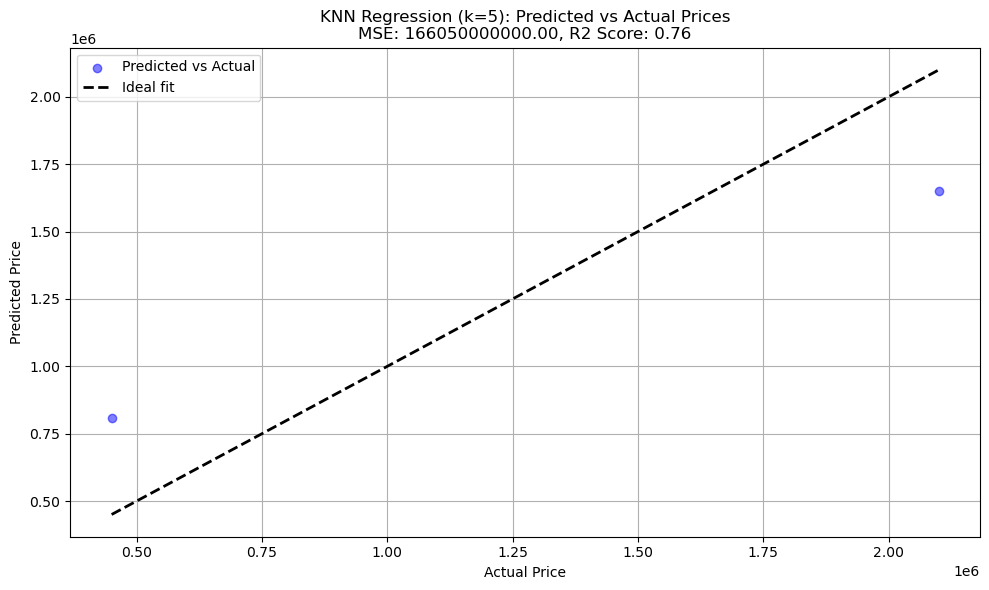

In [377]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Separate features and target variable
X = data.drop(columns=["Price"])  # Exclude only the target variable (Price)
y = data["Price"]

# Set up a preprocessing pipeline to handle categorical data
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Define transformations for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Build pipeline with preprocessing and KNN model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('knn', KNeighborsRegressor(n_neighbors=5))])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal fit')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"KNN Regression (k=5): Predicted vs Actual Prices\nMSE: {mse:.2f}, R2 Score: {r2:.2f}")
plt.legend()
plt.grid(True)
plt.show()


In [245]:
    df

,Date,living area,lot area,number of floors,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Luxury,luxury
6459,2016-08-05,2500,51836,1.0,3,9,1510,990,2013,0,122012,52.6994,-114.179,2270,54450,3,51,650000,1,0
10885,2016-10-16,1275,20000,1.0,4,6,1275,0,1991,0,122069,52.6096,-114.680,1660,20000,2,76,309600,1,1
1369,2016-05-22,1930,15531,2.0,3,7,1930,0,1979,0,122040,52.5750,-114.486,1580,7800,1,80,275000,1,1
740,2016-05-13,700,6000,1.0,4,6,700,0,1949,0,122014,52.9815,-114.506,920,6000,1,62,267800,0,1
3474,2016-06-23,2210,9371,2.0,4,8,2210,0,1968,0,122066,52.5934,-114.469,2300,11584,3,69,305000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,2016-07-17,2500,8540,2.0,3,9,2500,0,1990,0,122011,52.8059,-114.184,2560,8475,1,61,639000,1,1
13418,2016-12-02,1340,10035,1.0,3,7,1340,0,1959,0,122063,52.7216,-114.444,2090,10035,1,50,227000,0,0
5390,2016-07-21,3270,168000,2.0,4,10,3270,0,1982,0,122053,52.7497,-114.381,3220,7963,2,52,750000,1,1
860,2016-05-15,1310,1500,2.0,3,8,1160,150,2006,0,122044,52.8412,-114.499,1320,1581,1,61,500000,1,1


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

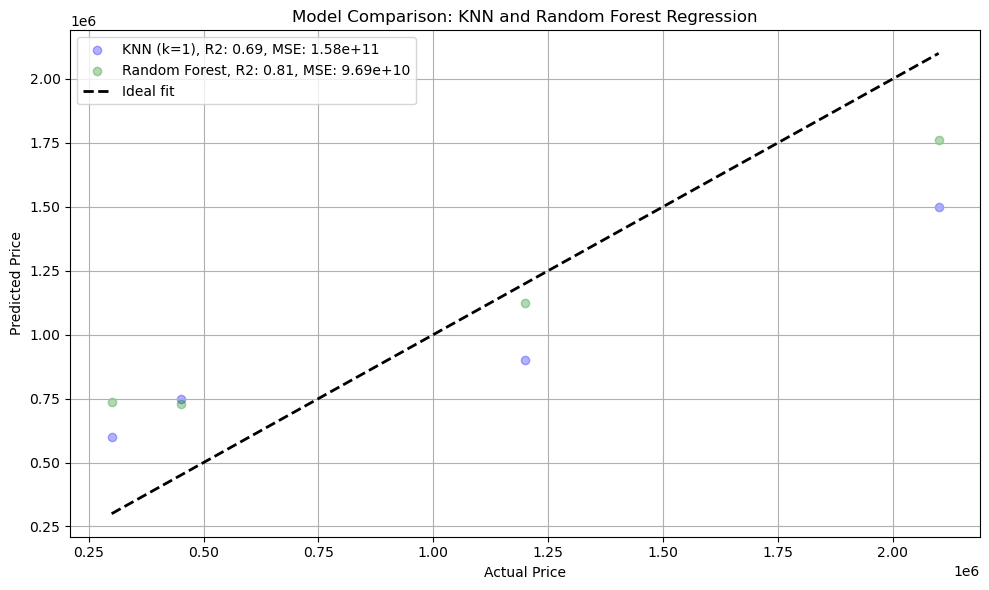

In [379]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np



# Data Preprocessing: Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data.drop(columns=["Price"])
y = data["Price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)  # Increased test size for more points

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': range(1, 15)}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']

# Retrain KNN with the best k
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn = knn_best.predict(X_test_scaled)

# Evaluate KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Train a Random Forest Regressor as an alternative model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Plotting the results with more points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color="blue", alpha=0.3, label=f"KNN (k={best_k}), R2: {r2_knn:.2f}, MSE: {mse_knn:.2e}")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.3, label=f"Random Forest, R2: {r2_rf:.2f}, MSE: {mse_rf:.2e}")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label="Ideal fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model Comparison: KNN and Random Forest Regression")
plt.legend()
plt.grid(True)
plt.show()


KNN reg RMSE test:  166759.66394093758
KNN reg test score:  0.8026611364019274


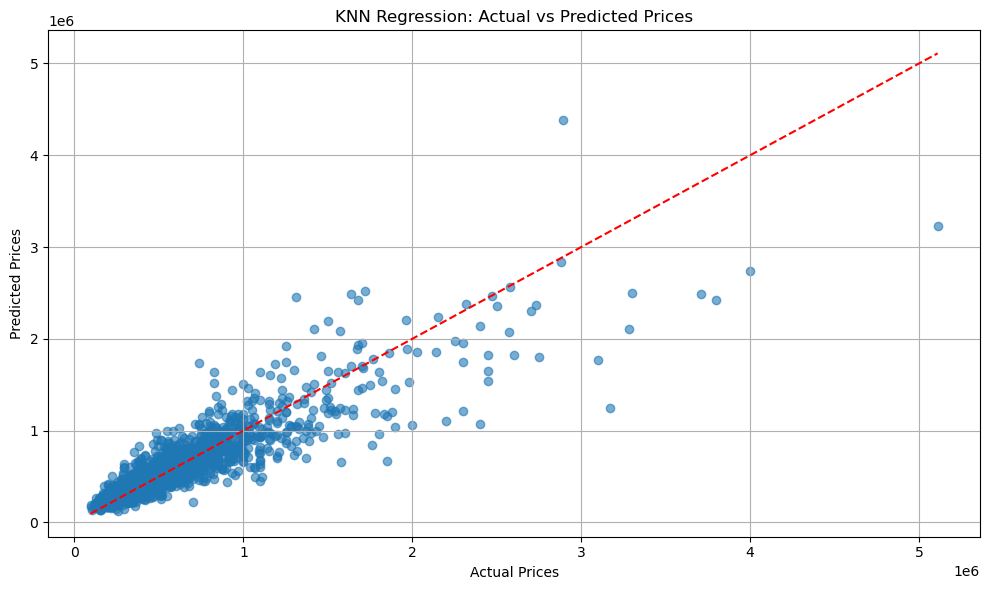

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Preprocessing: Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Lattitude', 'Longitude', 'number of bedrooms', 'number of bathrooms', 
                  'living area', 'lot area', 'number of floors', 'condition of the house', 
                  'grade of the house']  # Add more relevant numerical features as needed
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define features (X) and target variable (y)
X = df[numerical_cols]  # Use selected numerical features
y = df['Price']  # Target variable for regression

# Train-test split for regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
pred_test = knn_model.predict(X_test)

# Calculate RMSE and R² score for test data
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
r2_test_score = r2_score(y_test, pred_test)

# Print RMSE and R² score for KNN regression model
print('KNN reg RMSE test: ', rmse_test)
print("KNN reg test score: ", r2_test_score)

# Visualization (if applicable)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_test, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('KNN Regression: Actual vs Predicted Prices')
plt.grid()
plt.show()

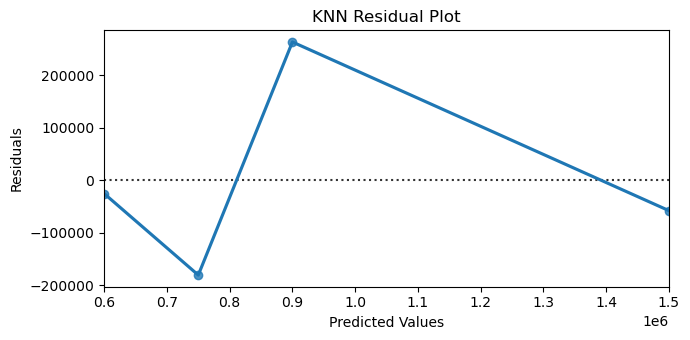

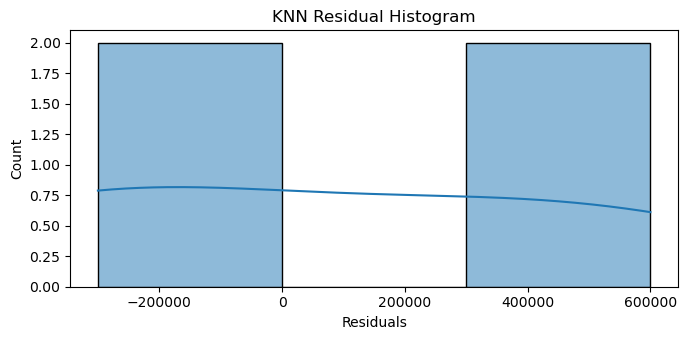

NameError: name 'learning_curve' is not defined

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

# Residual Plot
sns.residplot(x=y_pred_knn, y=y_test - y_pred_knn, lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('KNN Residual Plot')
plt.show()

# Histogram of Residuals
sns.histplot(y_test - y_pred_knn, kde=True)
plt.xlabel('Residuals')
plt.title('KNN Residual Histogram')
plt.show()

# Learning Curve (You'll need to implement a function to generate learning curves)
train_sizes, train_scores, test_scores = learning_curve(knn_best, X_train_scaled, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('KNN Learning Curve')
plt.legend()
plt.show()

Precision: 0.91
Recall: 0.80
F1 Score: 0.86
F2 Score: 0.82


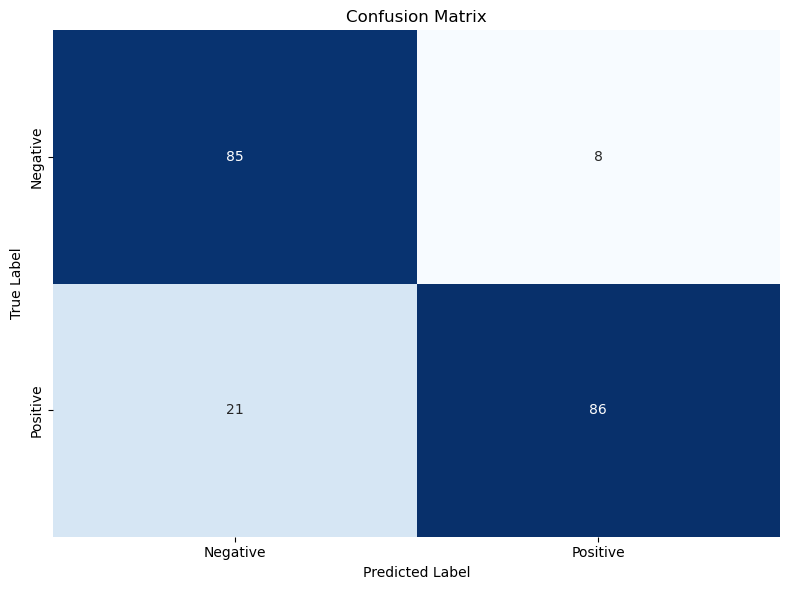

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, fbeta_score

# Sample data creation (replace this with your actual dataset)
# For example, let's create a binary classification dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"F2 Score: {f2:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# DEEP LEARNING IMPLEMENTATION

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 141.9695 - val_loss: 111.7101
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116.2722 - val_loss: 94.1907
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95.5556 - val_loss: 77.7348
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78.3904 - val_loss: 62.5671
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.0710 - val_loss: 48.6092
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.6384 - val_loss: 36.4080
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.6092 - val_loss: 26.4197
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.6014 - val_loss: 18.1137
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.4558 - val_loss: 11.9536
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3832 - val_loss: 7.5105
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1987 - val_loss: 4.5750
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0460 - val_loss: 0.8626
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9660 - val_loss: 0.8626
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0148 - val_loss: 0.8622
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9911 - val_loss: 0.8625
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9405 - val_loss: 0.8624
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9924 - val_loss: 0.8618
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0119 - val_loss: 0.8617
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9781 - val_loss: 0.8617
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9829 - val_loss: 0.8614
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9783 - val_loss: 0.8615
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0813 - val_loss: 0.8612
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0493 

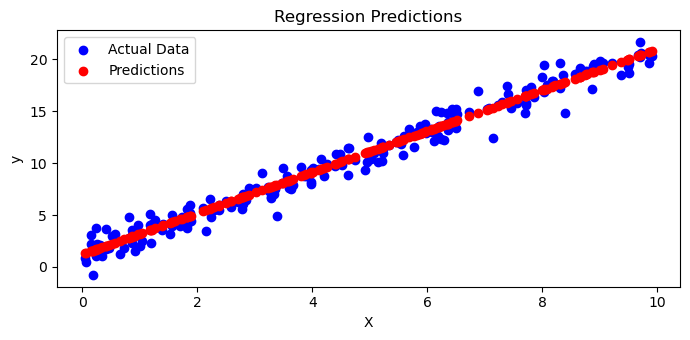

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Generate synthetic data for regression
np.random.seed(42)
X = np.random.rand(1000, 1) * 10  # Features
y = 2 * X + 1 + np.random.randn(1000, 1)  # Target with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = keras.Sequential([
    layers.Input(shape=(1,)),          # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1)                     # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, label='Actual Data', color='blue')
plt.scatter(X_test, predictions, label='Predictions', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Predictions')
plt.legend()
plt.show()

Epoch 1/100


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 425887399936.0000 - val_loss: 432689348608.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 402200363008.0000 - val_loss: 407057596416.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 373659238400.0000 - val_loss: 349598908416.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 304399777792.0000 - val_loss: 269455556608.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 249424035840.0000 - val_loss: 190251008000.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 190493949952.0000 - val_loss: 133506203648.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 112853139456.0000 - val_loss: 103843848192.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 93840269312.0000 - val_loss: 92027183104.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 83283550208.0000 - val_loss: 86560038912.0000
Epoch 10/100
366/366 ━━━━━━━━━━━━━━

366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45242515456.0000 - val_loss: 46531940352.0000
Epoch 59/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49424011264.0000 - val_loss: 46406770688.0000
Epoch 60/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51869077504.0000 - val_loss: 46284345344.0000
Epoch 61/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43284340736.0000 - val_loss: 46168010752.0000
Epoch 62/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47122391040.0000 - val_loss: 46032232448.0000
Epoch 63/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47537225728.0000 - val_loss: 45903720448.0000
Epoch 64/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44580515840.0000 - val_loss: 45785890816.0000
Epoch 65/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48161816576.0000 - val_loss: 45665095680.0000
Epoch 66/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49040785408.0000 - val_loss: 45551132672.0000
Epoch 67/100
366/366 ━━━━━━━━━━━━━━━━━━━━

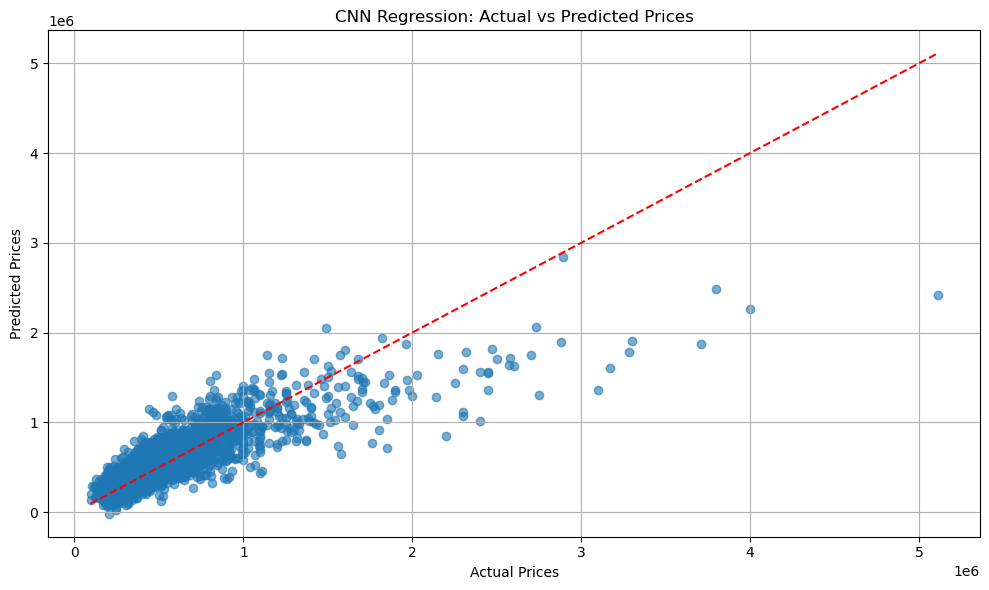

In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


# Select relevant numerical features for CNN regression
features = ['number of bedrooms', 'number of bathrooms', 'living area', 
            'lot area', 'number of floors', 'condition of the house', 
            'grade of the house', 'Lattitude', 'Longitude']

# Define features (X) and target variable (y)
X = df[features].values
y = df['Price'].values

# Reshape X to have a channel dimension (samples, height, width, channels)
X = X.reshape(X.shape[0], X.shape[1], 1, 1)  # Reshape for CNN input

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

# Define the CNN model architecture
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)),
    layers.MaxPooling2D(pool_size=(1, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('CNN Regression: Actual vs Predicted Prices')
plt.grid()
plt.show()

Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 421733990400.0000 - val_loss: 434936905728.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 420101586944.0000 - val_loss: 425762652160.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 423492812800.0000 - val_loss: 403050528768.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 386261909504.0000 - val_loss: 366048772096.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 345064603648.0000 - val_loss: 316863512576.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 303676325888.0000 - val_loss: 262121553920.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 239933030400.0000 - val_loss: 207915302912.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 190962466816.0000 - val_loss: 161906065408.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 163308421120.0000 - val_loss: 127433285632.0000
Epo

Epoch 58/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 44228075520.0000 - val_loss: 41645096960.0000
Epoch 59/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 42804080640.0000 - val_loss: 41531019264.0000
Epoch 60/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 42914840576.0000 - val_loss: 41422315520.0000
Epoch 61/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 44912201728.0000 - val_loss: 41324797952.0000
Epoch 62/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 46069952512.0000 - val_loss: 41221033984.0000
Epoch 63/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 39979208704.0000 - val_loss: 41109921792.0000
Epoch 64/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 42912653312.0000 - val_loss: 41038356480.0000
Epoch 65/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 43096068096.0000 - val_loss: 40936517632.0000
Epoch 66/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 42082791424.0000 - val_loss: 40851214336.0000
Epoch 67/1

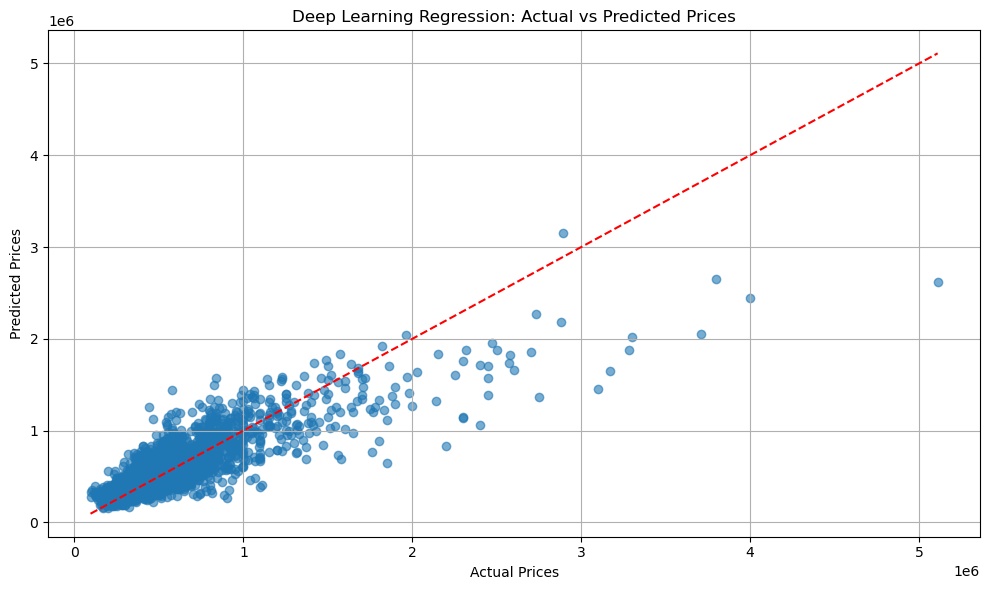

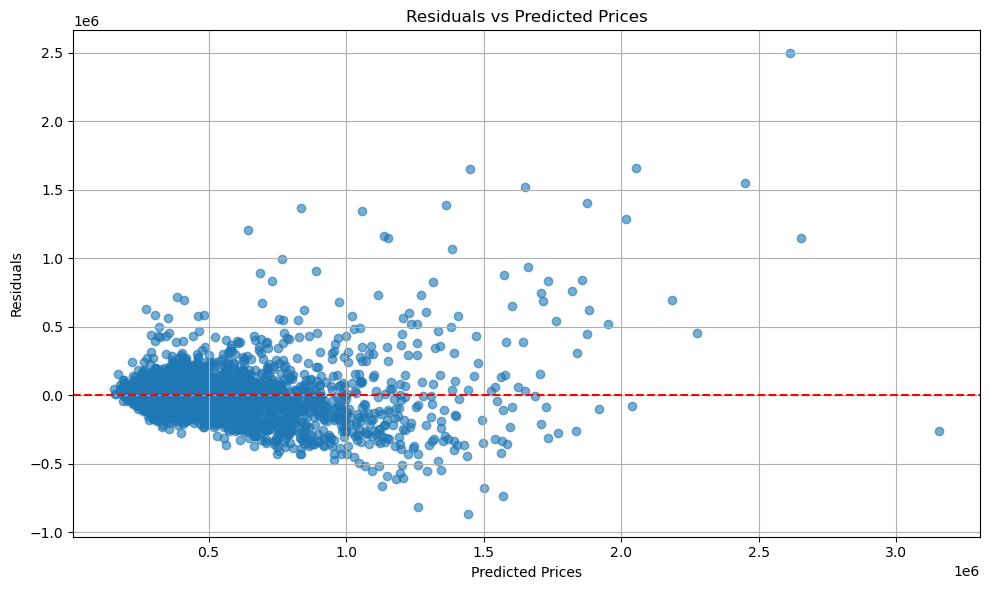

Significant Errors:
       Actual     Predicted      Residual
0      235000  4.211898e+05 -186189.75000
2      615000  4.958954e+05  119104.56250
3      555000  4.456508e+05  109349.15625
6      980000  7.731458e+05  206854.25000
7      535000  3.404945e+05  194505.53125
...       ...           ...           ...
2916   204000  2.729738e+05  -68973.84375
2917   299995  3.893995e+05  -89404.46875
2920   550000  7.694324e+05 -219432.37500
2921  1010000  1.176882e+06 -166882.25000
2923   675000  5.668405e+05  108159.50000

[1909 rows x 3 columns]


In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score


# Select relevant features for the model
features = ['number of bedrooms', 'number of bathrooms', 'living area', 
            'lot area', 'number of floors', 'condition of the house', 
            'grade of the house', 'Lattitude', 'Longitude']
X = df[features].values
y = df['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep learning model architecture
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),               # Hidden layer 1
    layers.Dense(32, activation='relu'),               # Hidden layer 2
    layers.Dense(1)                                    # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}")

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Error Analysis

# Calculate residuals and create a DataFrame for analysis
residuals = y_test - predictions.flatten()
error_analysis_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions.flatten(),
    'Residual': residuals
})

# Print summary statistics of residuals
print(error_analysis_df.describe())

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions.flatten(), alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Deep Learning Regression: Actual vs Predicted Prices')
plt.grid()
plt.show()

# Plotting Residuals vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.grid()
plt.show()

# Analyze significant errors (define a threshold)
threshold = 50000  # Define a threshold for significant errors
significant_errors = error_analysis_df[abs(error_analysis_df['Residual']) > threshold]
print("Significant Errors:")
print(significant_errors)

In [68]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']

In [69]:
joblib.dump(preprocessor, "preprocessor.pkl")


['preprocessor.pkl']